# Assignment 3

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df= pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dataset yang digunakan merupakan suatu data dari bank terkait dengan kampanye pemasaran sebuah institusi perbankan Portugal. Kampanye pemasaran didasarkan pada panggilan telepon, untuk mengetahui apakah produk (deposito berjangka bank) akan dilanggan ('ya') atau tidak ('tidak').

## Data Cleaning & Filtering

In [4]:
df.shape

(45211, 17)

Terlihat dari dataset tersebut terdapat 17 kolom dan masing-masing kolom berisi 45.211 baris data.

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Berikut merupakan deskriptive statistics sekilas dari data, terilhat bahwa rata-rata umur (age) pelanggan pada data tersebut yaitu berusia 41 tahun.

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dari data tersebut tidak terdapat missing value atau NaN pada masing-masing kolom pada dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data terdiri dari 7 kolom ber-datatype integer dan 10 kolom ber-datatype string.

**Mengkategorikan Nilai**

In [8]:
ctg = df.select_dtypes(include=object)
ctg_columns = ctg.columns
ctg_feat = list(ctg_columns)
print(ctg_feat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [9]:
for feature in ctg_feat:
    print('Kategorinya adalah {} dan nilai unik dari kategori tersebut adalah {}'.format(feature,len(df[feature].unique())))

Kategorinya adalah job dan nilai unik dari kategori tersebut adalah 12
Kategorinya adalah marital dan nilai unik dari kategori tersebut adalah 3
Kategorinya adalah education dan nilai unik dari kategori tersebut adalah 4
Kategorinya adalah default dan nilai unik dari kategori tersebut adalah 2
Kategorinya adalah housing dan nilai unik dari kategori tersebut adalah 2
Kategorinya adalah loan dan nilai unik dari kategori tersebut adalah 2
Kategorinya adalah contact dan nilai unik dari kategori tersebut adalah 3
Kategorinya adalah month dan nilai unik dari kategori tersebut adalah 12
Kategorinya adalah poutcome dan nilai unik dari kategori tersebut adalah 4
Kategorinya adalah y dan nilai unik dari kategori tersebut adalah 2


Berikut merupakan jumlah nilai unik dari masing-masing kategori, terlihat bahwa kategori job dan month(bulan) memiliki nilai unik yang paling besar yaitu berjumlah 12.

In [10]:
for feature in ctg_feat:
    print("Jumlah nilai dari '{}' kategori adalah\n".format(feature.title()))
    print(df[feature].value_counts().sort_index())
    print('______________________________________________________________________________')

Jumlah nilai dari 'Job' kategori adalah

admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64
______________________________________________________________________________
Jumlah nilai dari 'Marital' kategori adalah

divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
______________________________________________________________________________
Jumlah nilai dari 'Education' kategori adalah

primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64
______________________________________________________________________________
Jumlah nilai dari 'Default' kategori adalah

no     44396
yes      815
Name: default, dtype: int64
_______________________________________________________

In [11]:
ctg_feat_job = ctg_feat[:1]

In [12]:
ctg_feat_job

['job']

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

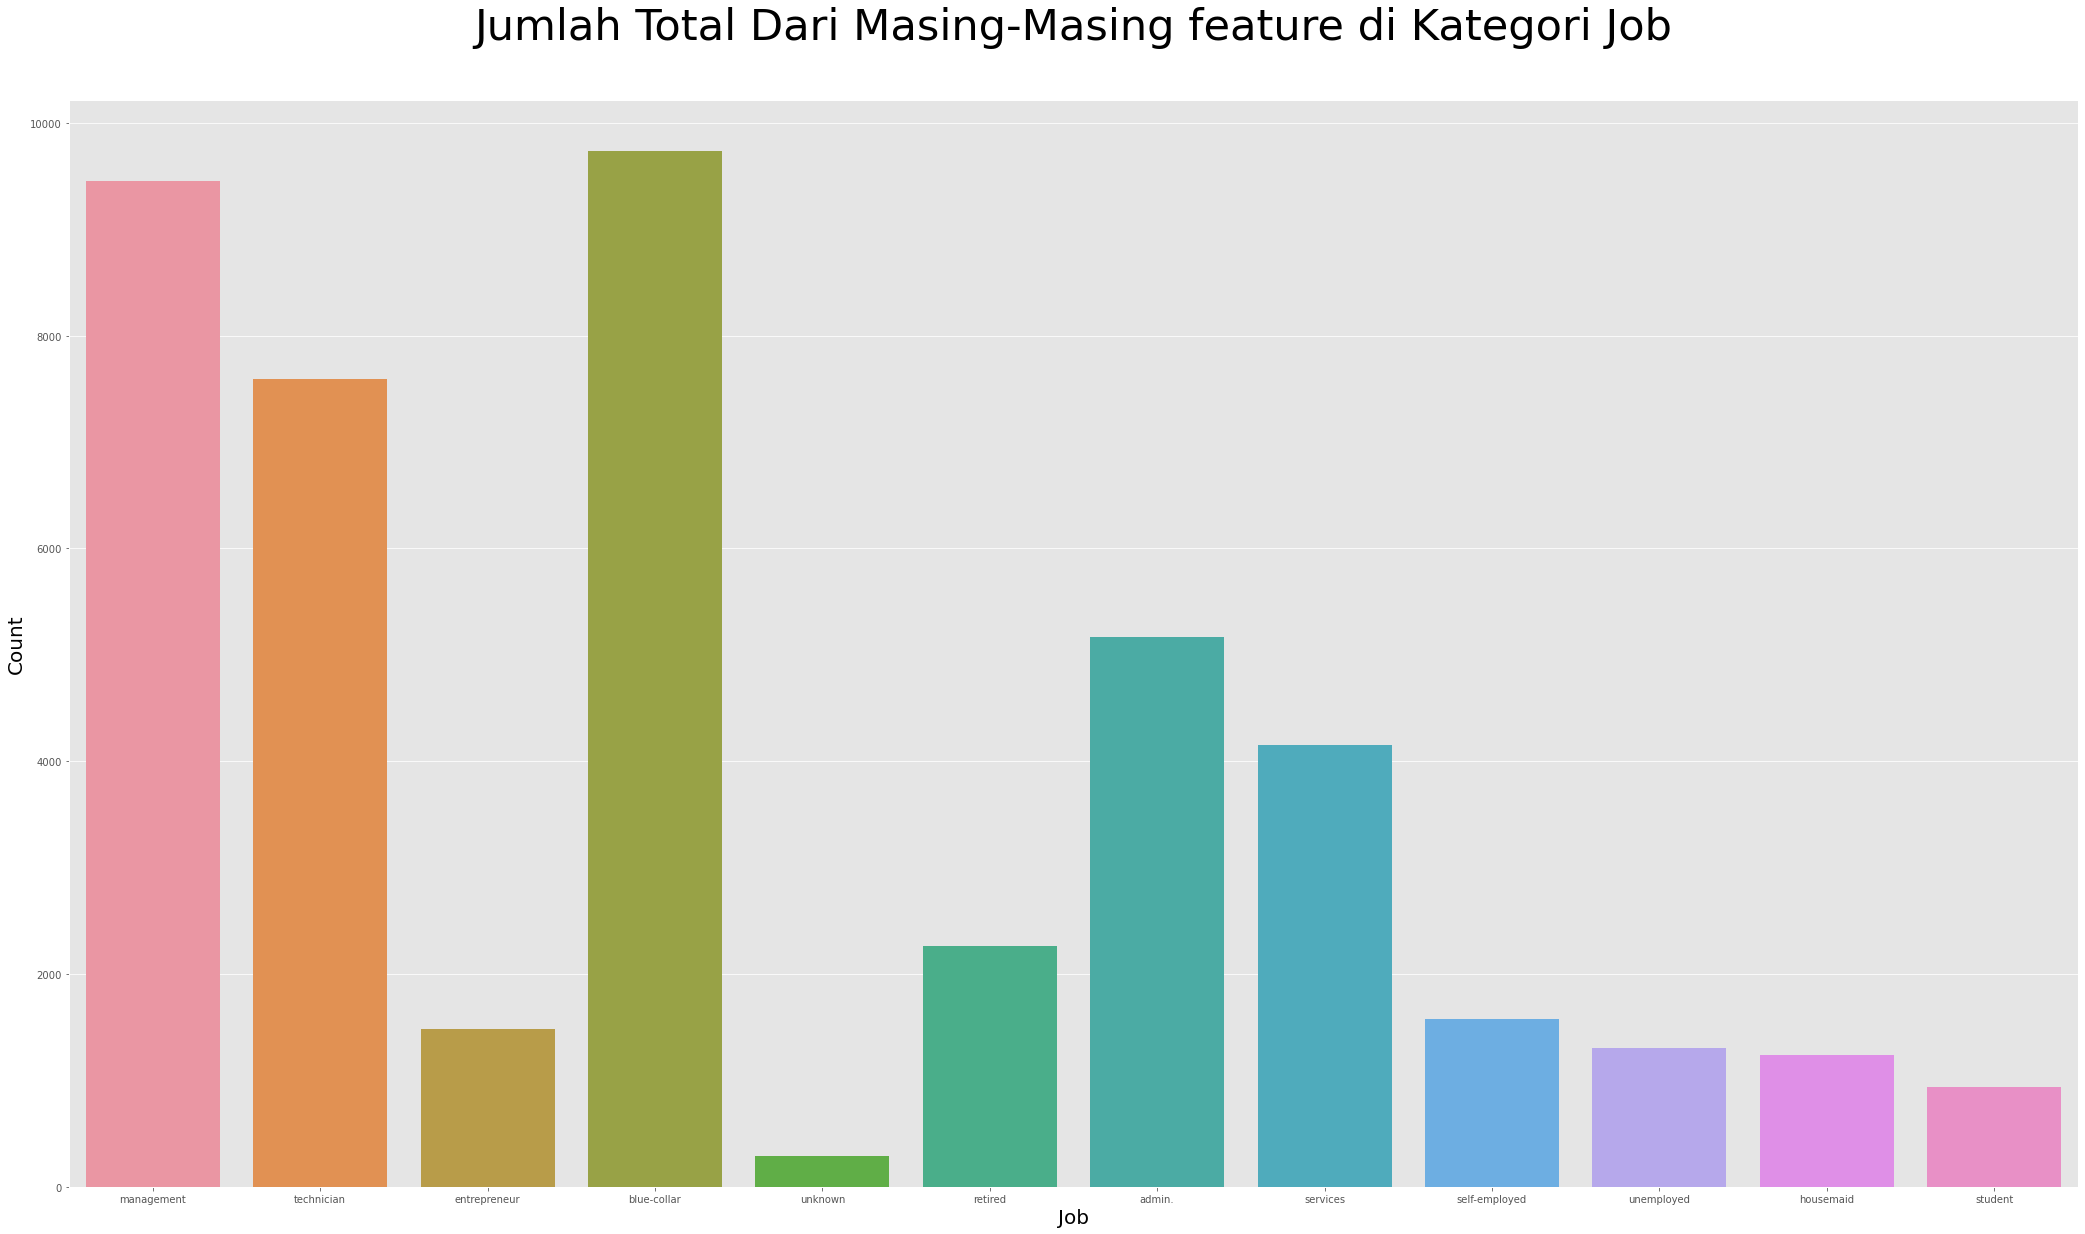

In [14]:
for feature in ctg_feat_job: 
    fig = plt.subplots(figsize=(36,20))
    plt.rcParams.update({'font.size': 30})
    data = df[feature].value_counts()
    countplot = sns.countplot(x=feature, data=df)
    plt.title('Jumlah Total Dari Masing-Masing feature di Kategori Job', y=1.05)
    plt.xlabel('Job', fontsize=20, color='black')
    plt.ylabel('Count', fontsize=20, color='black')
    plt.show()

Terlihat dari grafik bar atau batang diatas bahwa job yang paling banyak yaitu job blue collar yang mana karyawan yang melakukan kerja kasar untuk suatu organisasi dan mendapatkan upah yang dibayarkan setiap jam dengan total sebanyak 9.732.

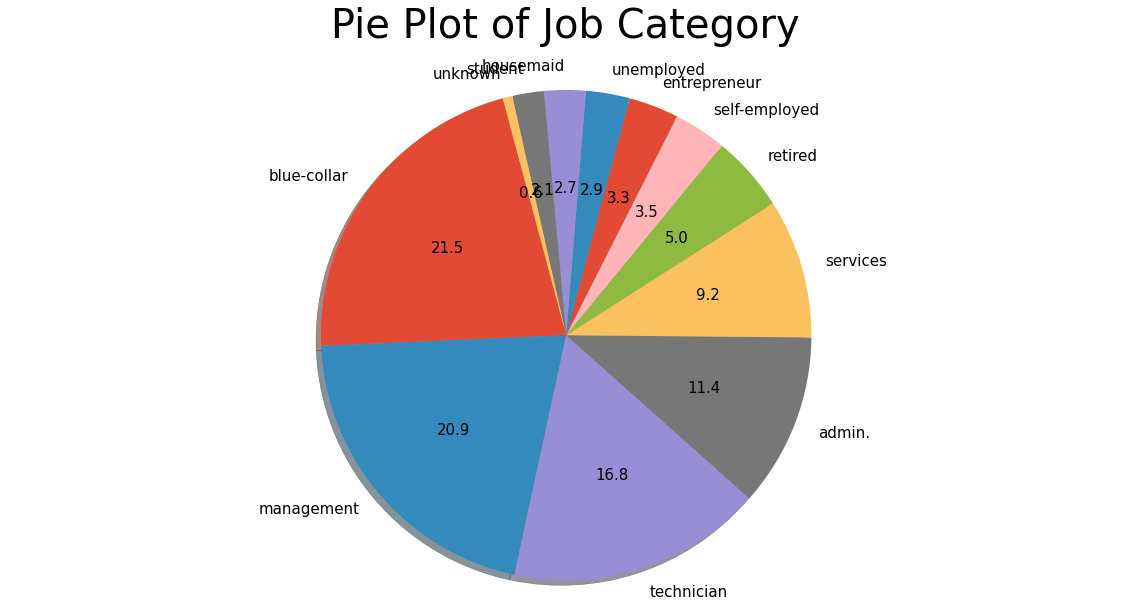

In [15]:
for feature in ctg_feat_job: 
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    data = df[feature].value_counts()
    barplot = data.plot(kind='pie',startangle=105,  title=feature, autopct="%3.1f", fontsize=15, shadow=True, ylabel='')
    plt.title('Pie Plot of Job Category', y=1.04, fontsize=40)
    plt.axis('equal')
    plt.show()

Terlihat dari Pie Plot diatas bahwa blue-collar memiliki 21,3% nilai dari total keseluruhan data pada job kategori.

In [16]:
df.duplicated().sum()

0

Terlihat bahwa tidak ada data ganda atau duplikat pada dataset yang digunakan.

In [17]:
corr_matt=df.corr()
corr_matt

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


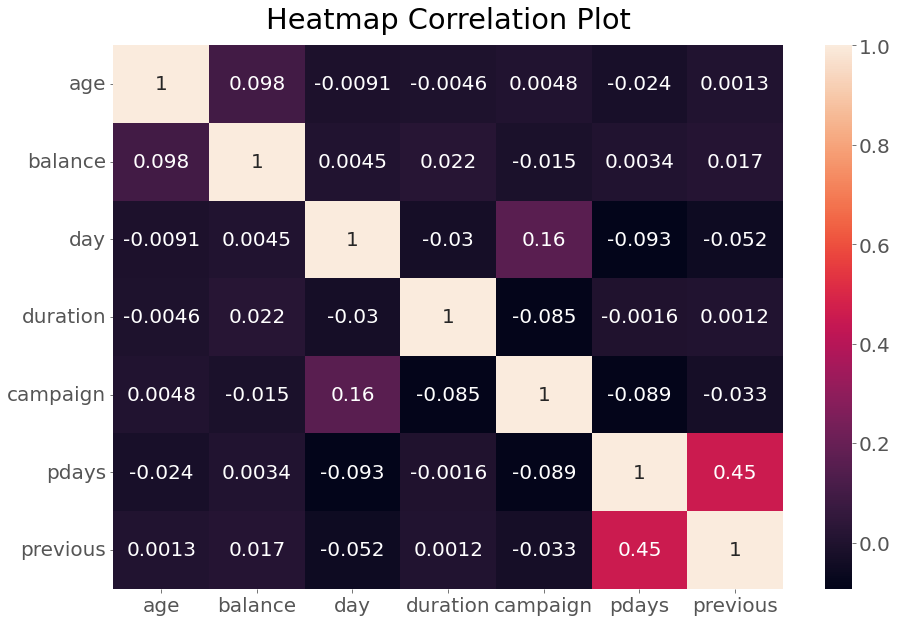

In [18]:
# Heatmap Correlation
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_matt,annot=True)
plt.title('Heatmap Correlation Plot', y=1.02)
plt.show()

Dari plot heatmap diatas dapat disimpulkan bahwa tidak terdapat korelasi yang cukup tinggi dari data, korelasi yang cukup tinggi terjadi pada previous dengan pdays dengan tingkat korelasi sebesar 0.45. Perubahan pada variabel pdays akan cukup mempengaruhi variabel previous.

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Label Encoding

In [20]:
label_encoding = {"y":{"no":0,"yes":1},
                  "job":{"management":1,"technician":2,"entrepreneur":3,"blue-collar":4,"unknown":5,"retired":6,"admin.":7,"services":8,"self-employed":9,"unemployed":10,"housemaid":11,"student":12}}

In [21]:
df_enc = df.replace(label_encoding)

In [22]:
df_enc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,2,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,3,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,4,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,5,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


Encoding dilakukan untuk mengubah kategori dari variabel menjadi nilai numerik sehingga memudahkan dalam proses memodelkan Machine Learning.

## Membangun Beberapa Model Machine Learning

## Logistic Regression

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [24]:
X = df_enc[['age','balance','duration']]
y = df_enc.y

Ubah X menjadi suatu dataframe yang berisi kolom age, balance, dan duration, sedangkan y sebagai targetnya.

In [25]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2024)

In [26]:
from sklearn.linear_model import LogisticRegression

***Membuat model Machine Learning Logistic Regression***

In [27]:
LR_model = LogisticRegression(solver='liblinear', C=0.5, random_state=2024, multi_class='ovr')
LR_model.fit(X_train,y_train)

LogisticRegression(C=0.5, multi_class='ovr', random_state=2024,
                   solver='liblinear')

Model Machine Learning Logistic Regression telah dibangun selanjutnya fit data X_train dan y_train supaya model dapat belajar untuk memprediksi data.

In [28]:
# Cek score dari model
print('Data Train Score', LR_model.score(X_train,y_train))
print('Data Testing Score', LR_model.score(X_train,y_train))

Data Train Score 0.8894365974657945
Data Testing Score 0.8894365974657945


Diperoleh output sebagai berikut terlihat dari score data train dan data testing karena score antara data train dan data testing tidak terlalu jauh maka dapat disimpulkan bahwa model yang telah dibangun tidak terjadi overfitting.

In [29]:
# Model Predict
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

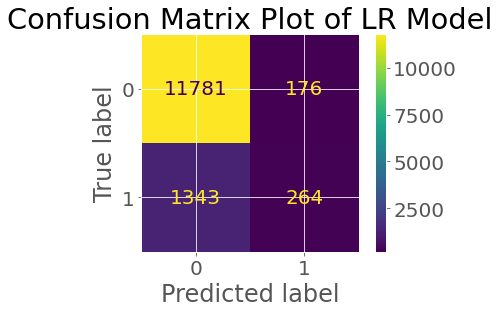

In [31]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Plot of LR Model')
plt.show()

Dari hasil output Confusion matrix diatas dapat diketahui bahwa model dapat menebak 11.781 data dengan label '0':'No' yang berarti (True Negative), false negativenya 1343, false positive sebesar 176, dan 264 data dengan label '1':'yes'(true positive). Model cukup banyak melakukan kesalahan dalam memprediksi suatu data.

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11957
           1       0.60      0.16      0.26      1607

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



## K-Nearest Neighbor (KNN)

In [33]:
X_KNN = X.copy()
y_KNN = y.copy()

In [34]:
X_KNN.shape

(45211, 3)

In [35]:
y_KNN.shape

(45211,)

In [36]:
# Splitting Data
X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(X_KNN,y_KNN,test_size=0.3, random_state=2024)

In [37]:
# Import library KNN
from sklearn.neighbors import KNeighborsClassifier

Coba dengan k=5

In [38]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_KNN_train,y_KNN_train)

y_KNN_pred_5 = knn_5.predict(X_KNN_test)

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(y_KNN_test,y_KNN_pred_5))

Accuracy : 0.8745945148923622


              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11957
           1       0.44      0.20      0.27      1607

    accuracy                           0.87     13564
   macro avg       0.67      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



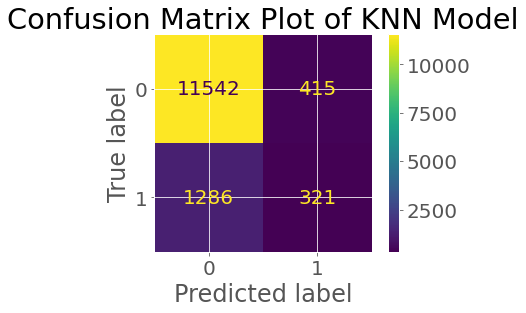

In [40]:
print(classification_report(y_KNN_test, y_KNN_pred_5))

cm_KNN = confusion_matrix(y_KNN_test, y_KNN_pred_5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
disp.plot()
plt.title('Confusion Matrix Plot of KNN Model')
plt.show()

Coba dengan k=7

In [41]:
scaler = StandardScaler()

In [42]:
X_KNN_train_sc = scaler.fit_transform(X_KNN_train)
X_KNN_test_sc = scaler.fit_transform(X_KNN_test)

In [43]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_KNN_train_sc,y_KNN_train)

y_KNN_pred_7_sc = knn_7.predict(X_KNN_test_sc)
print('Accuracy: ', accuracy_score(y_KNN_test, y_KNN_pred_7_sc))

Accuracy:  0.8840312592155706


              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11957
           1       0.52      0.23      0.32      1607

    accuracy                           0.88     13564
   macro avg       0.71      0.60      0.63     13564
weighted avg       0.86      0.88      0.86     13564



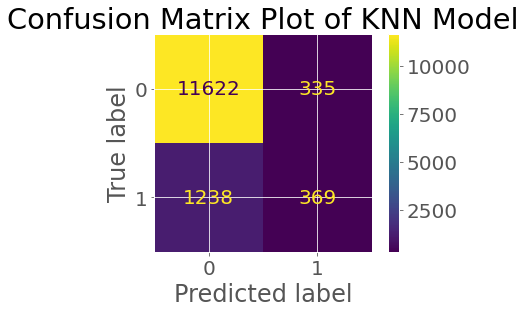

In [44]:
print(classification_report(y_KNN_test, y_KNN_pred_7_sc))

cm_KNN = confusion_matrix(y_KNN_test, y_KNN_pred_7_sc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
disp.plot()
plt.title('Confusion Matrix Plot of KNN Model')
plt.show()

Dari hasil output Confusion matrix KNN dengan k=7 diatas dapat diketahui bahwa model dapat menebak 11.622 data dengan label '0':'No' yang berarti (True Negative), false negativenya 1.238, false positive sebesar 335, dan 369 data dengan label '1':'yes'(true positive). Model cukup banyak melakukan kesalahan dalam memprediksi suatu data.

## Decision Tree

In [45]:
# Import library Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [46]:
X_dt = X.copy()
y_dt = y.copy()

In [47]:
# Splitting data
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt,y_dt,test_size=0.3, random_state=2024)

In [48]:
# Membangun model Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_dt_train,y_dt_train)

DecisionTreeClassifier()

In [49]:
print('Data train score : ', dtc.score(X_dt_train, y_dt_train))
print('Data test score: ', dtc.score(X_dt_test, y_dt_test))

Data train score :  0.9995576199955762
Data test score:  0.83338248304335


Hasil output dari model score Decision Tree diatas dapat disimpulkan model sudah cukup baik dalam memprediksi suatu data baik data training maupun data testing. Namun, Selisih score antar train set dan test set juga cukup besar sehingga dapat disimpulkan terjadi overfitting pada model tersebut.

In [50]:
y_dt_pred_train = dtc.predict(X_dt_train)
y_dt_pred_test = dtc.predict(X_dt_test)

test set 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     11957
           1       0.31      0.33      0.32      1607

    accuracy                           0.83     13564
   macro avg       0.61      0.62      0.61     13564
weighted avg       0.84      0.83      0.84     13564



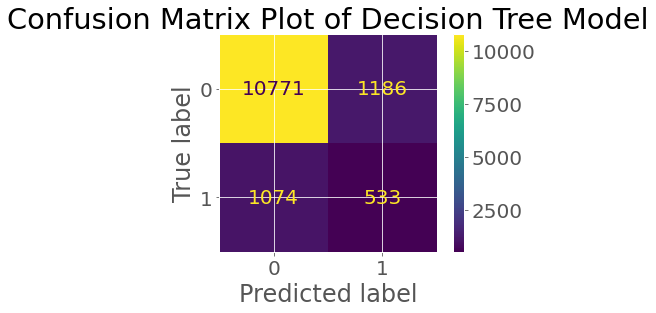

In [51]:
print('test set \n',classification_report(y_dt_test,y_dt_pred_test))

cm_dt = confusion_matrix(y_dt_test, y_dt_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.title('Confusion Matrix Plot of Decision Tree Model')
plt.show()

Dari hasil output Confusion matrix diatas dapat diketahui bahwa model dapat menebak 10.778 data dengan label '0':'No' yang berarti (True Negative), false negativenya 1086, false positive sebesar 1179, dan 521 data dengan label '1':'yes'(true positive). Model cukup banyak melakukan kesalahan dalam memprediksi suatu data.

## Random Forest

In [52]:
X_rf = X.copy()
y_rf = y.copy()

In [53]:
# Splitting Data
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf,y_rf,test_size=0.3, random_state=2024)

In [54]:
# Import library Random Forest
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Membangun model Random Forest
rfc_model = RandomForestClassifier(n_estimators=100)

rfc_model.fit(X_rf_train,y_rf_train)

RandomForestClassifier()

In [56]:
print('Data train score : ', rfc_model.score(X_rf_train, y_rf_train))
print('Data test score: ', rfc_model.score(X_rf_test, y_rf_test))

Data train score :  0.9995576199955762
Data test score:  0.8841787083456207


Hasil output dari model score Random Forest model sudah cukup baik dalam memprediksi data. Namun, selisih score antar train set dan test set juga cukup besar sehingga dapat disimpulkan terjadinya overfitting pada model tersebut.

In [57]:
y_rf_pred_train = rfc_model.predict(X_rf_train)
y_rf_pred_test = rfc_model.predict(X_rf_test)

test set 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     11957
           1       0.52      0.24      0.33      1607

    accuracy                           0.88     13564
   macro avg       0.71      0.60      0.63     13564
weighted avg       0.86      0.88      0.86     13564



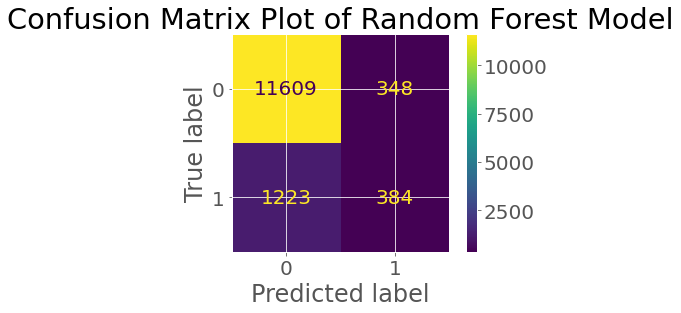

In [58]:
print('test set \n',classification_report(y_rf_test,y_rf_pred_test))

cm_rf = confusion_matrix(y_rf_test, y_rf_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title('Confusion Matrix Plot of Random Forest Model')
plt.show()

Dari hasil output Confusion matrix diatas dapat diketahui bahwa model dapat menebak 11.592 data dengan label '0':'No' yang berarti (True Negative), false negativenya 1230, false positive sebesar 365, dan 377 data dengan label '1':'yes'(true positive). Model cukup banyak melakukan kesalahan dalam memprediksi suatu data.

## Naive Bayes

In [59]:
X_nb = X.copy()
y_nb = y.copy()

In [60]:
# Splitting Data
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb,y_nb,test_size=0.3, random_state=2024)

In [61]:
# Import library Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [62]:
# Membangun Model Naive Bayes
NB_model = GaussianNB()

NB_model.fit(X_nb_train,y_nb_train)

GaussianNB()

In [63]:
print('Data train score : ', NB_model.score(X_nb_train, y_nb_train))
print('Data test score: ', NB_model.score(X_nb_test, y_nb_test))

Data train score :  0.8814421588144216
Data test score:  0.8794603361840165


Hasil output dari model score Naive Bayes dapat disimpulkan baik dalam memprediksi suatu data baik data training maupun data testing. Selisih score antar train set dan test set juga tidak besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.

In [64]:
y_nb_pred_train = NB_model.predict(X_nb_train)
y_nb_pred_test = NB_model.predict(X_nb_test)

test set 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     11957
           1       0.48      0.28      0.35      1607

    accuracy                           0.88     13564
   macro avg       0.70      0.62      0.64     13564
weighted avg       0.86      0.88      0.86     13564



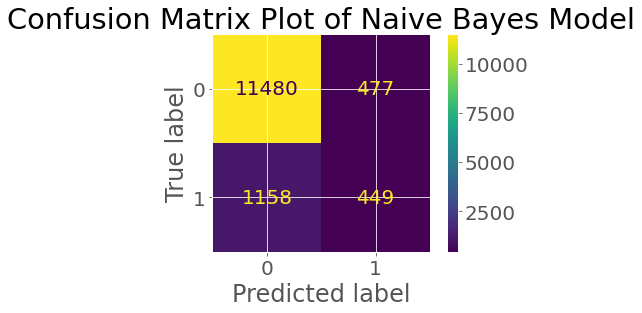

In [65]:
print('test set \n',classification_report(y_nb_test,y_nb_pred_test))

cm_nb = confusion_matrix(y_nb_test, y_nb_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.title('Confusion Matrix Plot of Naive Bayes Model')
plt.show()

Dari hasil output Confusion matrix diatas dapat diketahui bahwa model dapat menebak 11.480 data dengan label '0':'No' yang berarti (True Negative), false negativenya 1158, false positive sebesar 477, dan 449 data dengan label '1':'yes'(true positive). Model cukup banyak melakukan kesalahan dalam memprediksi suatu data.

## Support Vector Machine (SVM)

In [66]:
# Import library SVM
from sklearn.svm import LinearSVC

In [67]:
X_svc = X.copy()
y_svc = y.copy()

In [68]:
# Splitting Data
X_svc_train, X_svc_test, y_svc_train, y_svc_test = train_test_split(X_svc,y_svc,test_size=0.3, random_state=2024)

In [69]:
svc_model = LinearSVC(random_state=0, tol=1e-5)
svc_model.fit(X_svc_train, y_svc_train.ravel()) 

C:\Users\muham\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [70]:
print('Data train score : ', svc_model.score(X_svc_train, y_svc_train))
print('Data test score: ', svc_model.score(X_svc_test, y_svc_test))

Data train score :  0.8834644674060732
Data test score:  0.8813771748746683


Hasil output dari model score SVM dapat disimpulkan baik dalam memprediksi suatu data baik data training maupun data testing. Selisih score antar train set dan test set juga tidak besar sehingga dapat disimpulkan tidak terjadi overfitting pada model tersebut.

In [71]:
y_svc_pred_train = svc_model.predict(X_svc_train)
y_svc_pred_test = svc_model.predict(X_svc_test)

test set 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11957
           1       0.25      0.00      0.00      1607

    accuracy                           0.88     13564
   macro avg       0.57      0.50      0.47     13564
weighted avg       0.81      0.88      0.83     13564



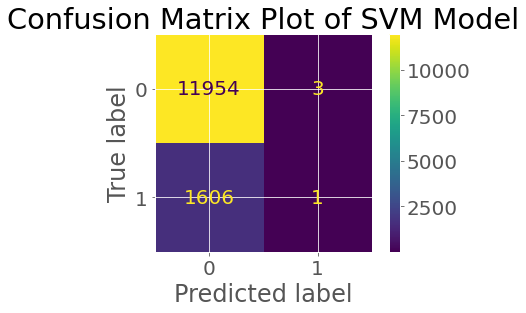

In [72]:
print('test set \n',classification_report(y_svc_test,y_svc_pred_test))

cm_svc = confusion_matrix(y_svc_test, y_svc_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.title('Confusion Matrix Plot of SVM Model')
plt.show()

Dari hasil output Confusion matrix diatas dapat diketahui bahwa model dapat menebak 11.954 data dengan label '0':'No' yang berarti (True Negative), false negativenya 1606, false positive sebesar 3, dan 1 data dengan label '1':'yes'(true positive). Model cukup banyak melakukan kesalahan dalam memprediksi suatu data.

### Kesimpulan

Dari hasil analisis diatas dapat disimpulkan bahwa Machine Learning model Logistic Regression merupakan model yang terbaik dari data tersebut karena memiliki nilai score yang tertinggi diantara machine learning model yang lainnya (KNN, SVM, Decision Tree, Naive Bayes). Dengan model score yang tinggi hal ini memungkinkan model untuk dapat memprediksi suatu data dengan baik. Selain itu, model score antara train set dengan test set tidak memiliki perbedaan yang signifikan atau tidak jauh berbeda sehingga dapat disimpulkan bahwa model tersebut juga tidak overfitting.